In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\vaibh\Machine Learning\DataSets\walmart-recruiting-store-sales-forecasting\train.csv")
features=pd.read_csv(r"C:\Users\vaibh\Machine Learning\DataSets\walmart-recruiting-store-sales-forecasting\features.csv")
stores=pd.read_csv(r"C:\Users\vaibh\Machine Learning\DataSets\walmart-recruiting-store-sales-forecasting\stores.csv")

df=df.merge(features,how='left')
df=df.merge(stores,how='left')

In [3]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


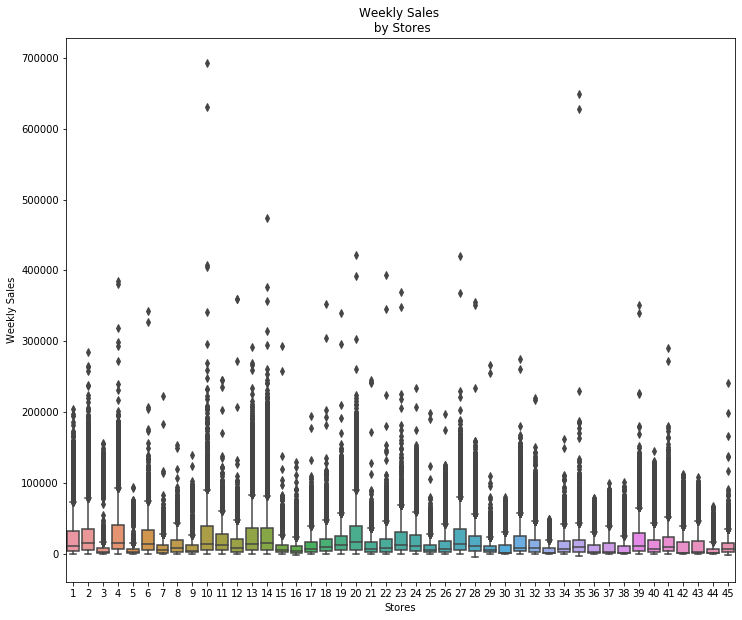

In [4]:
plt.figure(figsize=(12, 10))
sns.boxplot(y='Weekly_Sales',x='Store',data=df)
plt.title("Weekly Sales \n by Stores")
plt.xlabel("Stores")
plt.ylabel("Weekly Sales")
plt.show()

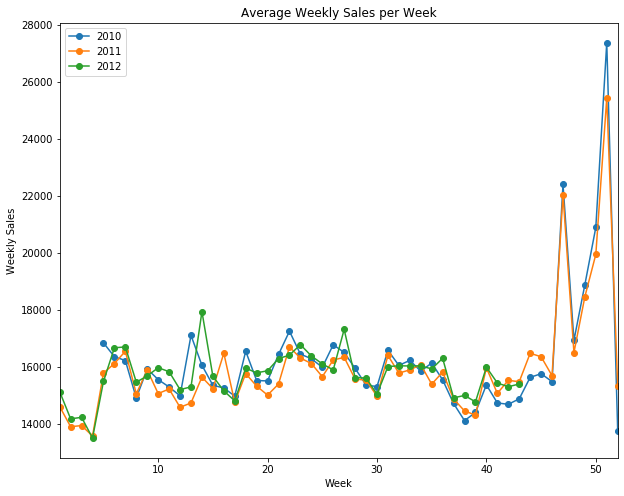

In [5]:

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Week'] = pd.to_datetime(df['Date']).dt.week
weeklysales2010=df[df.Year==2010]["Weekly_Sales"].groupby(df["Week"]).mean()
weeklysales2011=df[df.Year==2011]["Weekly_Sales"].groupby(df["Week"]).mean()
weeklysales2012=df[df.Year==2012]["Weekly_Sales"].groupby(df["Week"]).mean()

plt.figure(figsize=(10, 8))
plt.title("Average Weekly Sales per Week")
plt.ylabel("Weekly Sales")

weeklysales2010.plot(label='2010',marker='o')
weeklysales2011.plot(label='2011',marker='o')
weeklysales2012.plot(label='2012',marker='o')
plt.legend()
plt.show()

In [6]:
#Weeky Sales during Holiday
Holidays=pd.DataFrame(df,columns=["Date","Weekly_Sales","Year","IsHoliday","Week"])
Holidays=Holidays[Holidays.IsHoliday==True]

In [7]:
Holidays.Week.unique()

array([ 6, 36, 47, 52], dtype=int64)

In [8]:
Superbowl=Holidays[Holidays.Week==6]["Weekly_Sales"].groupby(df["Year"]).mean().reset_index()
LaborDay=Holidays[Holidays.Week==36]["Weekly_Sales"].groupby(df["Year"]).mean().reset_index()
Thanksgiving=Holidays[Holidays.Week==47]["Weekly_Sales"].groupby(df["Year"]).mean().reset_index()
Chritmas=Holidays[Holidays.Week==52]["Weekly_Sales"].groupby(df["Year"]).mean().reset_index()

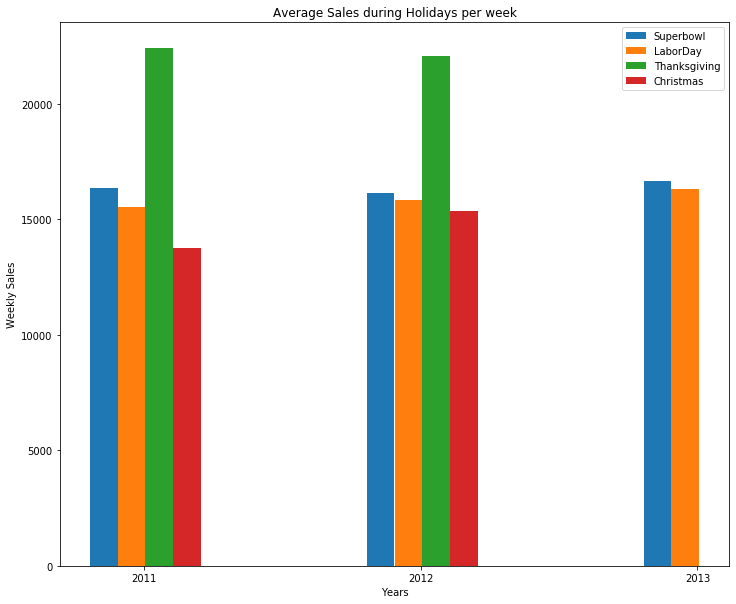

In [16]:
N=3
N1=2

PSuperbowl=Superbowl["Weekly_Sales"]
PLaborDay=LaborDay["Weekly_Sales"]
PThanksgiving=Thanksgiving["Weekly_Sales"]
PChritmas=Chritmas["Weekly_Sales"]

ind=np.arange(N)
ind1=np.arange(N1)

plt.figure(figsize=(12, 10))
width = 0.1      
plt.bar(ind, PSuperbowl, width, label='Superbowl')
plt.bar(ind + width, PLaborDay, width,label='LaborDay')
plt.bar(ind1 + width + width, PThanksgiving, width,label='Thanksgiving')
plt.bar(ind1 + width + width + width, PChritmas, width,label='Christmas')

plt.ylabel('Weekly Sales')
plt.xlabel('Years')
plt.title('Average Sales during Holidays per week')

plt.xticks(ind+width+0.045, ('2011', '2012', '2013'))
plt.legend(loc='best')
plt.show()

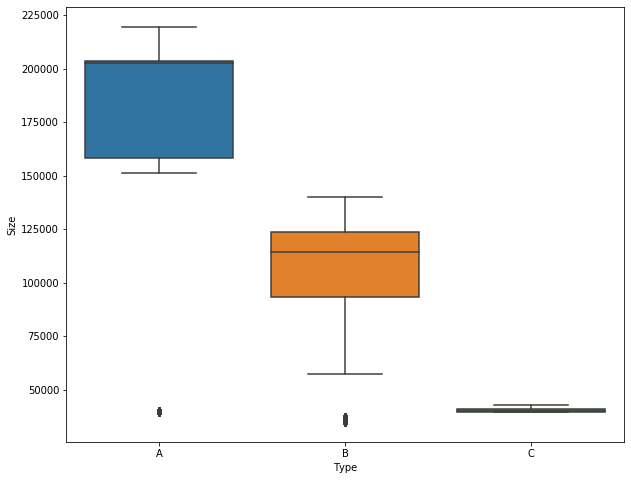

In [29]:
#Relation Size of Stores and Weekly Sales
plt.subplots(figsize=(10,8))
sns.boxplot(x='Type', y='Size', data=pd.concat([df['Type'],df['Size']], axis=1))

In [34]:
#Sales during Holidays and non-Holidays
NonHolidays=df[df.IsHoliday==False]["Weekly_Sales"].groupby(df["Year"]).mean().reset_index()
HolidaySales=df[df.IsHoliday==True]["Weekly_Sales"].groupby(df["Year"]).mean().reset_index()

In [33]:
NonHolidays

,Year,Weekly_Sales
0,2010,16203.107115
1,2011,15837.045217
2,2012,15656.357420


In [35]:
HolidaySales

,Year,Weekly_Sales
0,2010,17005.656337
1,2011,17343.581092
2,2012,16480.554253
